# Sequencing Analysis

Here, we run some analysis on the sequencing results from blast to find the number of target and nontarget files amplified for each trial of our PCR run.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.DataFrame(columns = ["FP1", "FP1 prop", "FP2", "FP2 prop","FP3", "FP3 prop",
                             "FP4","FP4 prop","FP5","FP5 prop","FP6","FP6 prop","FP7","FP7 prop",
                             "FP8","FP8 prop","FP9","FP9 prop", 
                             "RP1","RP1 prop","RP2" ,"RP2 prop","RP3","RP3 prop","RP4","RP4 prop",
                             "RP5","RP5 prop","RP6","RP6 prop","RP7","RP7 prop","RP8","RP8 prop","RP9","RP9 prop"])
columnsDf = []
for f in  range(1, 10):
    for r in range(1,10):
        newCol = "FP" +  str(f) + "/RP" + str(r) # adding all the names of files to columns of output file
        columnsDf.append(newCol)
fileCounts = pd.DataFrame(columns = columnsDf)

# files contains pairs of file names, the file containing the .txt output from the blast command and the new file created
# ---- after this processing script is run
files = [["outputF1.txt", "outputF1Proc.txt"], ["outputF2.txt", "outputF2Proc.txt"], ["outputF3.txt", "outputF3Proc.txt"], ["outputF4.txt", "outputF4Proc.txt"], ["outputF5.txt", "outputF5Proc.txt"]]

beginF = "Sequencing Data/" # where sequencing data folders are located

filePrims = {}

for names in files:       
    # set all counts back to zero    
    primerCounts = {"FP1" : 0, "FP1 prop" : 0, "FP2" : 0, "FP2 prop" : 0,
                    "FP3" : 0, "FP3 prop" : 0, "FP4" : 0, "FP4 prop" : 0,
                    "FP5" : 0, "FP5 prop" : 0, "FP6" : 0, "FP6 prop" : 0,
                    "FP7" : 0, "FP7 prop" : 0, "FP8" : 0, "FP8 prop" : 0,
                    "FP9" : 0, "FP9 prop" : 0, "RP1" : 0, "RP1 prop" : 0,
                    "RP2" : 0, "RP2 prop" : 0, "RP3" : 0, "RP3 prop" : 0,
                    "RP4" : 0, "RP4 prop" : 0, "RP5" : 0, "RP5 prop" : 0,
                    "RP6" : 0, "RP6 prop" : 0, "RP7" : 0, "RP7 prop" : 0,
                    "RP8" : 0, "RP8 prop" : 0, "RP9" : 0, "RP9 prop" : 0,
                   }
    
    # open the necessary files
    f2 = open(beginF +"Output after Processing Script/"+  names[1], 'r+') #will have processed data
    f2.truncate(0) # remove first row
    
    f = open(beginF + "Sequencing Data after Blast/" +names[0]) # original data
    count = 0 # count what line you are on
    sumTot = 0 # count total number of lines
    
    primerPairs = []
    # process data
    for line in f:
        parsed = line.split() 
        count = count + 1
        if (count > 2): 
            minLength = 15
            maxSend = 85
            #remove unwanted rows with values outside the specified limits
            if (not (int(parsed[3]) < minLength or int(parsed[9]) > maxSend)): # only adds lines with specified length/send to processed data
                f2.write(line)
                sumTot = sumTot + 1
                primer = parsed[0]
                primerCounts[primer] = primerCounts[primer] + 1 # incrementing respective primer count
                # check if sseqid is in the list
                ss = parsed[1]
                if (ss in filePrims): # found a match!
                    primerPairs.append([filePrims[ss], parsed[0]])
                    del filePrims[ss]
                else: 
                    filePrims[ss] = parsed[0]
    
    print(len(primerPairs)/len(filePrims))
    #count occurences of each file
    TBA = []
    index = 0
    for f in  range(1, 10):
        for r in range(1,10):
            countfile = 0
            for pair in primerPairs:
                if (pair[0] == ("FP"+str(f)) and pair[1] == ("RP"+str(r))):
                    countfile+=1
            TBA.append(countfile)
    a_series = pd.Series(TBA, index = fileCounts.columns)
    fileCounts = fileCounts.append(a_series, ignore_index=True)
            
    # add proportions
    for key in primerCounts:
        if (len(key) == 3): 
            prop = primerCounts[key] / sumTot
            primerCounts[key + " prop"]= prop
    df = df.append(primerCounts, ignore_index=True)
    filePrims = {}
    print(sumTot/2)

fileCounts.to_csv("filesCountTest.csv")
# df.to_csv("countsProportTest.csv")

33.12608158220025
27203.5
39.7962202136401
98081.0
31.79073135409124
44593.5
22.908474576271185
48338.5
19.213188220230474
61584.0


## Plot the Sequencing Data

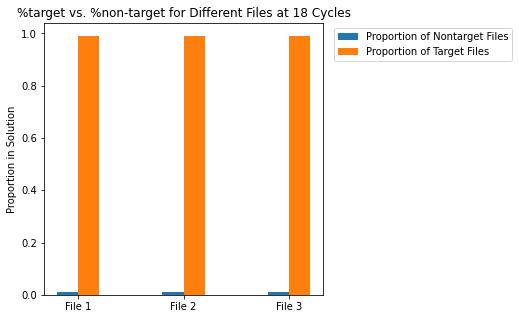

In [31]:
# N=3
# ind = np.arange(N)    # the x locations for the groups
# width = 0.35       # the width of the bars: can also be len(x) sequence
# targetP = (0.99, 0.989, 0.99)
# x= 1-0.99
# y=1-0.99
# z=1-0.99
# nonTargetP = (x, y,z)
# plt.figure(figsize=(7,7))

# p1 = plt.bar(ind, targetP, width, )
# p2 = plt.bar(ind, nonTargetP, width,
#              bottom=targetP)


# plt.ylabel('Proportion in Solution')
# plt.title('%target vs. %non-target for Different Files at 18 Cycles')
# plt.xticks(ind, ('1-1', '2-2', '3-3'))
# plt.yticks(np.arange(0, 1.1, 0.1))
# plt.legend((p1[0], p2[0]), ('Target', 'Non-target'))
# plt.show()



# Numbers of pairs of bars you want
N = 3

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = (0.01, 0.01, 0.01)
# Specify the values of orange bars (height)
orange_bar = (0.99, 0.99, 0.99)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(5,5))

# Width of a bar 
width = 0.2     

# Plotting
plt.bar(ind, blue_bar , width, label='Proportion of Nontarget Files')
plt.bar(ind + width, orange_bar, width, label='Proportion of Target Files')

# plt.xlabel('Here goes x-axis label')
plt.ylabel('Proportion in Solution')
plt.title('%target vs. %non-target for Different Files at 18 Cycles')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('File 1', 'File 2', 'File 3'))

# Finding the best position for legends and putting it
plt.legend(loc='best', bbox_to_anchor=(1.02, 1))
plt.show()